In [1]:
from virusPropagationModel import *
import VPM_plotting as vpm_plot
%matplotlib inline
%load_ext autoreload
import glob
import os
import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
#%load_ext memory_profiler

In [2]:
geopath = 'datafiles/'
geofiles = {0:'Buildings_Gangelt_MA_1.csv',
            1:'Buildings_Gangelt_MA_3.csv',
           }         

# Initiate world

## Initiate a small version of the town Gangelt with 4 initially infected agents

In [3]:
world_to_pick = 1
n_initially_infected=4
modeledWorld_small = ModeledPopulatedWorld(1000,n_initially_infected, world_from_file=True, geofile_name=geopath+geofiles[world_to_pick], agent_agent_infection=True, input_schedules='schedules_v2')
n_people = modeledWorld_small.number_of_people
print('Number of agents: '+ str(n_people))

Number of agents: 1058


## Initiate the accurate version of the town Gangelt with n initially infected agents

In [ ]:
world_to_pick = 0
n_initially_infected=4
modeledWorld_large = ModeledPopulatedWorld(1000,n_initially_infected, world_from_file=True, geofile_name=geopath+geofiles[world_to_pick], agent_agent_infection=True, input_schedules='schedules_v2')
n_people = modeledWorld_large.number_of_people
print('Number of agents: '+ str(n_people))

# Info on world

### Plot histogram of age-distribution (blue) and ages of initially infected agents (red)

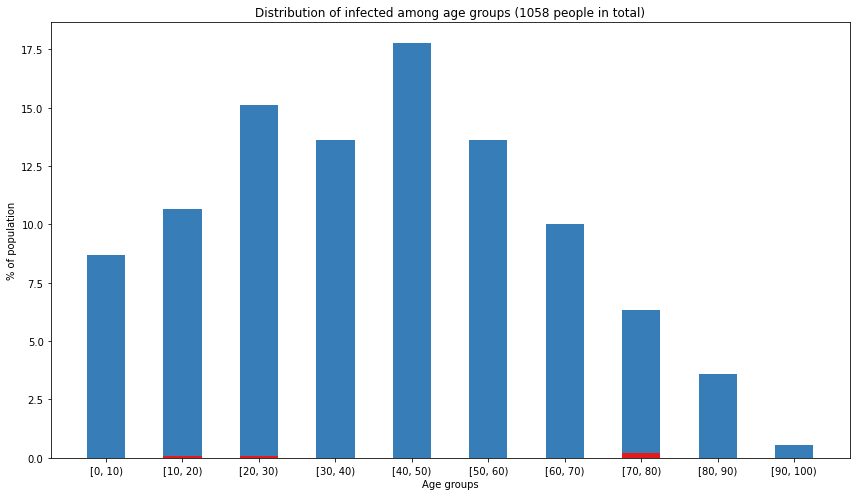

In [4]:
modeledWorld_small.plot_initial_distribution_of_ages_and_infected(age_groups_step=10)

### Get tabular information on agent-population (Agent-ID, age, home-location/household, agent-/schedule type and interactivity)

In [5]:
df_loc = modeledWorld_small.get_agent_info()
df_loc.head(4)

,ID,Age,Home,Type,Interaction Modifier
0,133,10,76,under_age,1
1,420,41,241,public_worker,1
2,263,24,154,adult,1
3,645,55,360,adult,1


### Get tabular information on agent-population (Location-ID, location-type, area, coordinates ...)

In [6]:
df_ag = modeledWorld_small.get_location_info()
df_ag.head(4)

,ID,Type,Area,Coordinates,Neighbourhood
0,0,work,7.679213e-07,"(5.988613849926164, 50.99435715575597)",3
1,1,work,2.035797e-07,"(5.9866766225745485, 50.9947386746526)",3
2,2,work,1.906354e-07,"(5.987261198255958, 50.99408186681645)",3
3,3,work,8.218644e-08,"(5.985594593704045, 50.99417663783578)",3


### Get number of locations of different types as table

In [7]:
modeledWorld_small.get_distribution_of_location_types()

,hospital,morgue,mixing_loc,work,public,school,home
0,1,1,1,47,22,2,490


### Plot the distribution of different agent-/schedule types and location-types (homes are ignored, due to large number and the mixing-location is only relevant for the homogeneous-mixing version of the model)

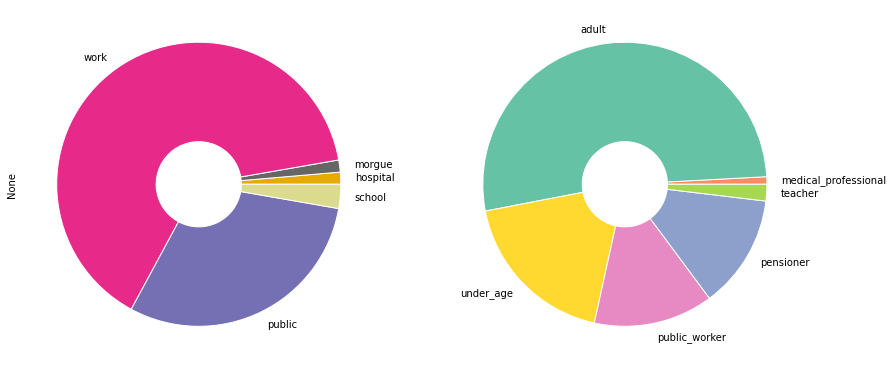

In [8]:
modeledWorld_small.plot_locations_and_schedules(locs_to_hide=['home','mixing_loc'])

# Sample simulation

### Choose the world to simulate 

In [9]:
world_to_use=modeledWorld_small
#world_to_use=modeledWorld_large

### Define characteristics of the simulation to be performed
##### Number of timesteps in hours
##### Scaling factor for the general infectivity (default value = 0.3)
##### Scaling factor for the general interaction-frequency (default-value=2/h)

In [10]:
timesteps=1500
general_infectivity=0.3
general_interaction_frequency=2

### Initiate simulation from world

In [11]:
simulation_default_infectivity = Simulation(copy.deepcopy(world_to_use),timesteps,run_immediately=False)

### Set agent infectivities to specified value and general interaction frequency to the specified value

In [12]:
simulation_default_infectivity.change_agent_attributes({'all':{'behaviour_as_infected':{'value':general_infectivity,'type':'replacement'}}})
simulation_default_infectivity.interaction_frequency=general_interaction_frequency

### Run simulation with specified characteristics

In [13]:
simulation_default_infectivity.simulate()

## Plotting simulation outcome

### Plot trajectories of agent-states and sub-states in the whole population

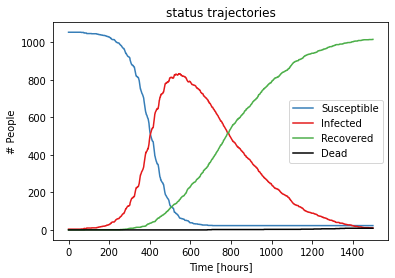

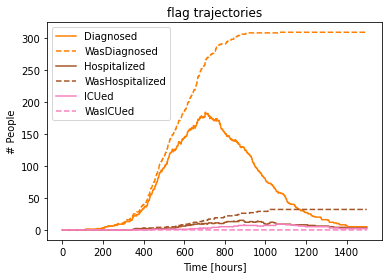

In [14]:
simulation_default_infectivity.plot_status_timecourse()
simulation_default_infectivity.plot_flags_timecourse(specific_flags=['Diagnosed','WasDiagnosed','Hospitalized','WasHospitalized','ICUed','WasICUed'])

### Plot state-trajectories, resolved by age-cohort

/home/stephan/corona/corona_model/VPM_plotting.py:271: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(nr_of_figure_rows, 2, i+1)
/home/stephan/corona/corona_model/VPM_plotting.py:271: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(nr_of_figure_rows, 2, i+1)
/home/stephan/corona/corona_model/VPM_plotting.py:271: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(nr_of_figure_rows, 2, i+1)
/home/stephan/corona/corona_model/VPM_plotting.py:271: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor re

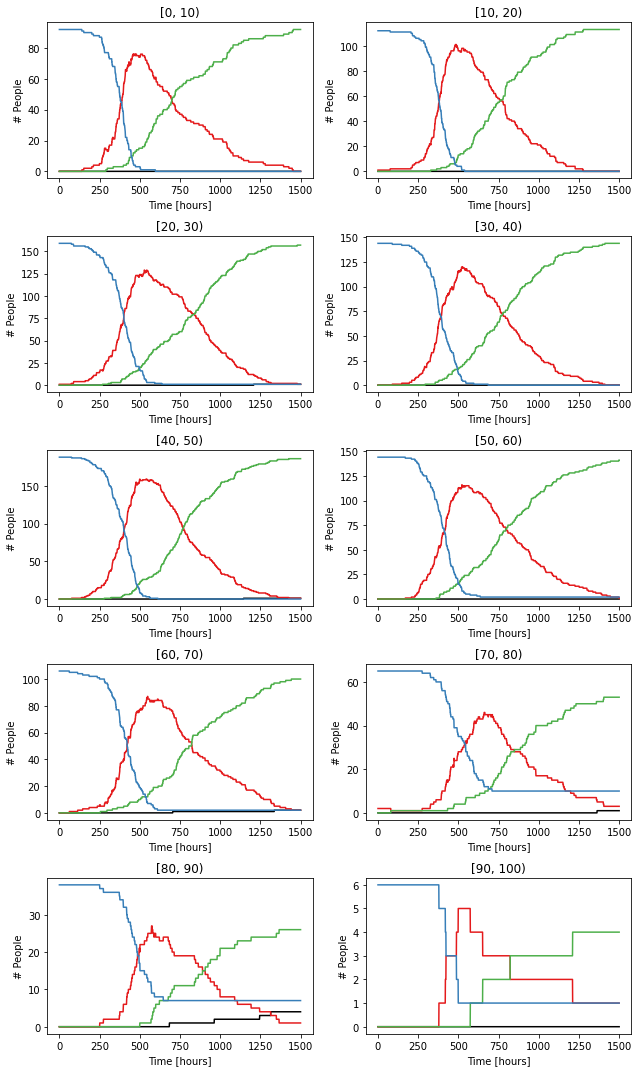

In [15]:
simulation_default_infectivity.plot_age_groups_status_timecourse()

### Plot heatmaps of age-specific interaction and infection-patterns

/home/stephan/corona/corona_model/virusPropagationModel.py:1544: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  interaction_matrix[contact_indices, person_indices] += 1


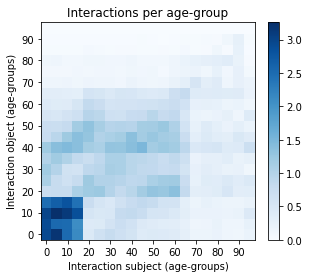

/home/stephan/corona/corona_model/virusPropagationModel.py:1461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Infections['aggregated_time'] = Days


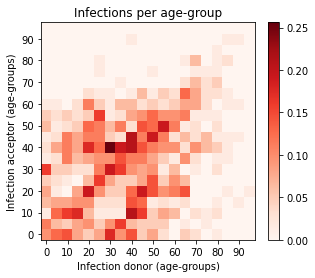

In [16]:
simulation_default_infectivity.plot_interaction_patterns()
simulation_default_infectivity.plot_infection_patterns()

### Plot the relative over- and under-representation in the infection transmission of different location and agent types

(<AxesSubplot:title={'center':'Infections per location-type'}>,
               values  positive
 home       -0.542897     False
 hospital   -0.000803     False
 mixing_loc -0.001773     False
 public      0.330537      True
 school      0.068229      True
 work        0.148480      True)

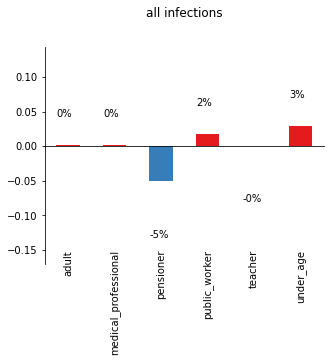

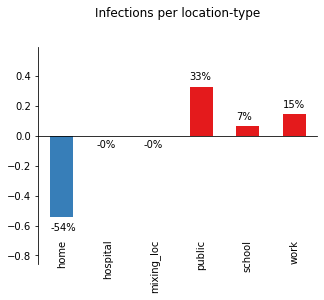

In [17]:
simulation_default_infectivity.plot_infections_per_schedule_type_delta(modeledWorld_small,relative=False, label_offset=0.04, title='all infections',save_figure=False)
simulation_default_infectivity.plot_infections_per_location_type_delta(modeledWorld_small,relative=False, label_offset=0.04,title='Infections per location-type',save_figure=False)